In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
 
#resize all the images to this
IMAGE_SIZE = [224 , 224]
 
train_path = r'C:\Users\King alagbe\.spyder-py3\dataset\train'
valid_path = r'C:\Users\King alagbe\.spyder-py3\dataset\test'
 
#add preprocssing layer to the front of VGG
vgg = VGG16(input_shape = IMAGE_SIZE + [3] , weights = 'imagenet' , include_top = False)
#dont train existing weights
for layer in vgg.layers:
    layer.trainable = False
    
#useful of getting number of classes
folders = glob(r'C:\Users\King alagbe\.spyder-py3\dataset\train\*')
 
#our layers - more can be added if needed
x = Flatten()(vgg.output)
# x =  Dense(1000, activation ='relu')(x) 
prediction =  Dense(len(folders), activation = 'softmax')(x)
#create a model object model
model = Model(inputs = vgg.input, outputs = prediction)
model.summary()
#tell the model what cost and optimization method to use
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy'])
 
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range= 0.2,
                                   horizontal_flip =True)
test_datagen =  ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
test_set = test_datagen.flow_from_directory(valid_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
#fit the model
r = model.fit(
    training_set,
    validation_data = test_set,
    epochs = 5,
    steps_per_epoch = len(training_set),
    validation_steps = len(test_set)
    )

Using TensorFlow backend.


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

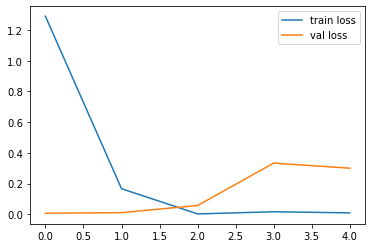

<Figure size 432x288 with 0 Axes>

In [2]:
import matplotlib.pyplot as plt
#loss
plt.plot(r.history['loss'], label = 'train loss')
plt.plot(r.history['val_loss'], label = 'val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

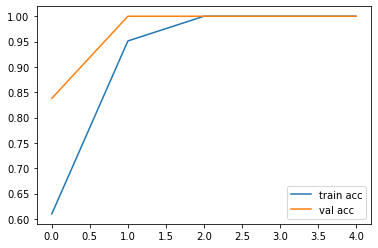

<Figure size 432x288 with 0 Axes>

In [3]:
#accuracies
plt.plot(r.history['accuracy'], label ='train acc')
plt.plot(r.history['val_accuracy'], label = 'val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [4]:
from keras.models import load_model
model.save('facdec.h5')